# <img style="float: left; padding-right: 10px; width: 45px" src="https://github.com/Harvard-IACS/2021-s109a/blob/master/lectures/crest.png?raw=true"> CS-S109A Introduction to Data Science 

## Lecture 3 (*k*-NN and Linear Regression)

**Harvard University**<br>
**Summer 2021**<br>
**Instructors:** Kevin Rader<br>
**Authors:** Rahul Dave, David Sondak, Will Claybaugh, Pavlos Protopapas, Chris Tanner, Kevin Rader

---

In [1]:
## RUN THIS CELL TO GET THE RIGHT FORMATTING 
import requests
from IPython.core.display import HTML
styles = requests.get("https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/cs109.css").text
HTML(styles)

# Table of Contents 
<ol start="0">
<li> Learning Goals </li>
<li> $k$-NN</li>
<li> Linear Regression Basics </li>
<li> Model Accuracy and Comparison </li>
<li> Inference in Linear Regression </li>    

## Learning Goals

This Jupyter notebook accompanies Lecture 3. By the end of this lecture, you should be able to:

- Understand the basics of statistical modeling
- Perform predictions and interpret the results of *k*-NN and simple linear regression models
- Evaluate the accuracy and compare models 
- Perform basic inferences in linear regression models
- Be comfortable fitting and using models from both `sklearn` and `statsmodels`, when appropriate 

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn as sk
import statsmodels as sm
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)

## Part 0: Reading in and exploring the data

Two datasets are provided for this notebook which represent the train and test splits of some simplified data sets for performing regression modeling.  We would like to build models to predict `votergap` from the 2020 election (Biden-Trump) from `density` (population density in persons per square mile) where each row represents a county in the US. 

We start by reading in the datasets for you and creating the necessary $Y$ variables:

**Important note: use the training dataset for all exploratory analysis and model fitting.  Only use the test dataset to evaluate and compare models.**


In [3]:

train = pd.read_csv("../data/county_election_20_train.csv")
test = pd.read_csv("../data/county_election_20_test.csv")

votergap_train = 100*(train['biden_perc']-train['trump_perc'])
votergap_test = 100*(test['biden_perc']-test['trump_perc'])

train['votergap'] = votergap_train
test['votergap'] = votergap_test



**Q0.1:** Look at summary statistics and visuals to explore the distributions of the 2 variables of interest along with visualizing their association.  Briefly summarize what you notice.

,density,votergap
count,2491.000000,2491.000000
mean,268.705379,-31.648500
std,1884.711742,31.558248
min,0.200000,-93.090909
25%,17.700000,-56.041734
50%,46.600000,-38.136710
75%,116.650000,-13.501772
max,69468.400000,80.525826


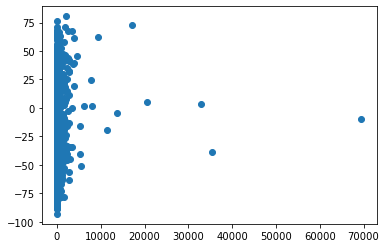

In [27]:
######
# your code here
###### 
display(train[['density','votergap']].describe())
plt.scatter(train[['density']], train[['votergap']])
#plt.hist(train[['density']], bins=100);


*your answer here*

Note: density is very right-skewed.  Let's consider using the log scale version:

**Q0.2:** Create the variable `log_density` using `np.log` and recreate the affected visuals from before.  Comment on the appropriateness of *k*-NN and linear regression using the log-transformed and untransformed versions of density.

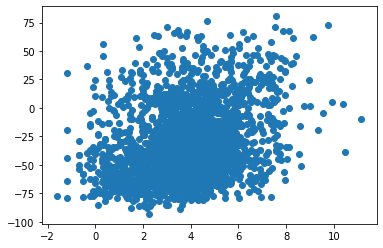

In [26]:
######
# your code here
######
train['log_density'] = np.log(train['density'])
#plt.hist(train[['log_density']], bins=10);
plt.scatter(train[['log_density']], train[['votergap']])

*your answer here*

## Part 1: Fitting and using sklearn's k-NN model


### Fitting an $k$-NN model with $k = 1$

In [29]:
from sklearn.neighbors import KNeighborsRegressor
knn1 = KNeighborsRegressor(n_neighbors=1)
train['log_density'].values.reshape(-1, 1)
knn1.fit(train['log_density'], train['votergap'])

#Note you will get an error message.  What does this tell you?

ValueError: Expected 2D array, got 1D array instead:
array=[2.43361336 5.7689458  2.18605128 ... 5.34041854 1.13140211 1.5040774 ].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [36]:
#Let's fit the model appropriatelty 
knn1.fit(train['log_density'].values.reshape(-1, 1), train['votergap'])


KNeighborsRegressor(n_neighbors=1)

**Q1.1** Fit four more $k$-NN models: ones with $k = \{10, 50, 100, 500\}$ and save thus as consistently named objects.

In [37]:
######
# your code here
######
knn10 = KNeighborsRegressor(n_neighbors=10)
train['log_density'].values.reshape(-1, 1)
knn10.fit(train['log_density'].values.reshape(-1, 1), train['votergap'])

knn50 = KNeighborsRegressor(n_neighbors=50)
train['log_density'].values.reshape(-1, 1)
knn50.fit(train['log_density'].values.reshape(-1, 1), train['votergap'])

knn100 = KNeighborsRegressor(n_neighbors=100)
train['log_density'].values.reshape(-1, 1)
knn100.fit(train['log_density'].values.reshape(-1, 1), train['votergap'])

knn500 = KNeighborsRegressor(n_neighbors=500)
train['log_density'].values.reshape(-1, 1)
knn500.fit(train['log_density'].values.reshape(-1, 1), train['votergap'])

KNeighborsRegressor(n_neighbors=500)

Predictions can be made and saved using the `sk.predict()` command, and the results can be interpretated by plotting the predictions on top of the scatterplot

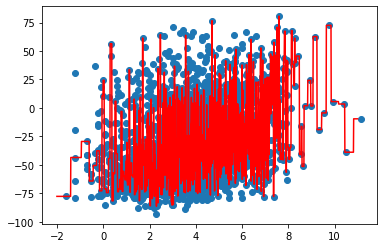

In [38]:

yhat1 = knn1.predict(train['log_density'].values.reshape(-1, 1))

x_dummy1 = np.arange(-2,11,0.01)
yhat_dummy1 = knn1.predict(x_dummy1.reshape(-1, 1))

plt.scatter(train['log_density'],train['votergap'])
plt.plot(x_dummy1,yhat_dummy1,c="r")
plt.show()

**Q1.2** Recreate the scatterplot above but with all five $k$-NN models presented.  Which of the five models do you think is most appropriate for predicting `votergap`?

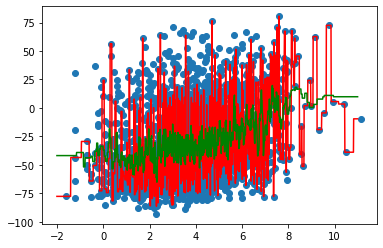

In [39]:
######
# your code here
######
yhat_dummy1 = knn1.predict(x_dummy1.reshape(-1, 1))
yhat_dummy10 = knn10.predict(x_dummy1.reshape(-1, 1))

plt.scatter(train['log_density'],train['votergap'])
plt.plot(x_dummy1,yhat_dummy1,c="r")
plt.plot(x_dummy1,yhat_dummy10,c="g")
plt.show()


*your answer here*


---

## Part 2: Linear Regression Basics 

In this section we will fit a linear model two ways: using both `sklearn` and `statmodels`.

First let's fit it using `sklearn`'s [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html):

In [40]:
from sklearn.linear_model import LinearRegression

regress = LinearRegression(fit_intercept=True).fit(train['log_density'].values.reshape(-1, 1), train['votergap'])

print("Beta0 =", regress.intercept_ ,", Beta1 =", regress.coef_)


Beta0 = -51.56651935005564 , Beta1 = [5.21615611]


**Q2.2** Plot the scatterplot with the fitted line.  Interpret the approriateness of a linear regression model from this plot.

In [ ]:
######
# your code here
######



Next, let's use `statmodels`'s [linear_model.OLS](https://www.statsmodels.org/devel/generated/statsmodels.regression.linear_model.OLS.html):

In [45]:
import statsmodels.regression.linear_model as lm

X = sm.tools.add_constant(train['log_density'])
model = lm.OLS(train['votergap'],X)
results = model.fit()
results.params

/Users/anuragmitra/opt/miniconda3/envs/cs109a/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2580: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


const         -51.566519
log_density     5.216156
dtype: float64

**Q2.2** Write down the estimated regression model here.  What is the predicted value for Middlesex County in Massachusetts (where Harvard resides)?

In [ ]:
######
# your code here
######


*your answer here*

**Q2.3** Plot the scatterplot with fitted regression line for this simple linear regression model.  Does a linear regression model seem appropriate?

In [ ]:
######
# your code here
######


*your answer here*

## Part 3: Model Accuracy and Comparison 


`sklearn` provides a nice framework for calculating $R^2$ for a model using the `sk.score` function from the model:

In [41]:
print(knn1.score(train['log_density'].values.reshape(-1, 1),train['votergap']))

print(regress.score(train['log_density'].values.reshape(-1, 1),train['votergap']))



0.2507195737560455
0.08123061352251204


**Q3.1** Calculate the $R^2$ score for all models seen on the test set.  Which is the best choice of $k$ in $k$-NN (of those considered)?  Does this best $k$-NN outperform linear regression?

In [43]:
######
# your code here
######
print(knn1.score(train['log_density'].values.reshape(-1, 1),train['votergap']))
print(knn10.score(train['log_density'].values.reshape(-1, 1),train['votergap']))
print(knn50.score(train['log_density'].values.reshape(-1, 1),train['votergap']))
print(knn100.score(train['log_density'].values.reshape(-1, 1),train['votergap']))
print(knn500.score(train['log_density'].values.reshape(-1, 1),train['votergap']))

0.2507195737560455
0.16677882545049505
0.11188263147597632
0.10335071457951728
0.08240304682651967


*your answer here*

**Q3.2** **You can skip this and come back to it later** Calculate MSE and $R^2$ manually from the linear regression model (in train).




In [ ]:
######
# your code here
######


## Part 4: Inference in Linear Regression 

`statsmodels` is definitely the way to go to for inferential calculations for linear regression models.  Use the output below to perform some interpretations:

In [46]:
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               votergap   R-squared:                       0.081
Model:                            OLS   Adj. R-squared:                  0.081
Method:                 Least Squares   F-statistic:                     220.1
Date:                Tue, 29 Jun 2021   Prob (F-statistic):           9.07e-48
Time:                        00:09:09   Log-Likelihood:                -12027.
No. Observations:                2491   AIC:                         2.406e+04
Df Residuals:                    2489   BIC:                         2.407e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         -51.5665      1.473    -35.003      0.000     -54.455     -48.678
log_density     5.2162      0.352     14.834      0.000       4.527       5.906
==============================================================================
Omnibus:                      211.913   Durbin-Watson:                   1.941
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              266.821
Skew:                           0.789   Prob(JB):                     1.15e-58
Kurtosis:                       3.283   Cond. No.                         10.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Q4.1** Provide 95\% confidence intervals for $\beta_0$ and $\beta_1$.  Interpret the results (interpret the estimates and the intervals).

$\beta_0$ = [-54.455	-48.678] \
$\beta_1$ = [4.527	5.906]

**Q4.2** Perform a formal hypothesis test to determine whether votergap is significantly associated with population density (on the log scale)

The formal hypothesis test would tell us that the votergap is associated with the population density, ie the null hypthesis of $\beta_1 = 0$ would fail since 0 is nowhere close to the confidence interval [4.527 5.906].

**Q4.3** Calculate the predicted values and residuals for the train set from the linear regression model.  Plot the histogram of residuals and residuals-vs.-predicted scatterplot.  Comment on the assumptions of the linear regression model 

(array([ 18., 123., 274., 583., 873., 391., 155.,  62.,   8.,   4.]),
 array([-59.96159875, -53.30679279, -46.65198684, -39.99718089,
        -33.34237493, -26.68756898, -20.03276302, -13.37795707,
         -6.72315111,  -0.06834516,   6.5864608 ]),
 <BarContainer object of 10 artists>)

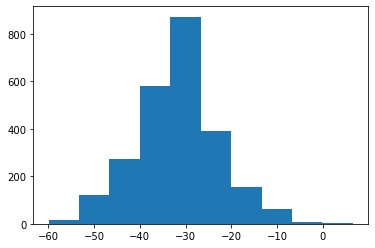

In [55]:
######
# your code here
######

plt.hist(regress.predict(train['log_density'].values.reshape(-1, 1)))

*your answer here*

**Q4.4** **We likely won't have time for this** Perform a bootstrap approach to calculate the 95\% confidence intervals based on the method, and compare them to the probabilistic-based ones above from statsmodels.

In [ ]:
######
# your code here
######

*your answer here*